In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [104]:
def powerLaw(t, greek, A):
    return A*np.power(np.abs(t), greek)

def expCorr(x, xi, A):
    return A*np.exp(-x/xi)

Tc = 2/(np.log(1+np.sqrt(2)))

print(f'Critical temperature, Tc = {Tc:.6f}.')

Critical temperature, Tc = 2.269185.


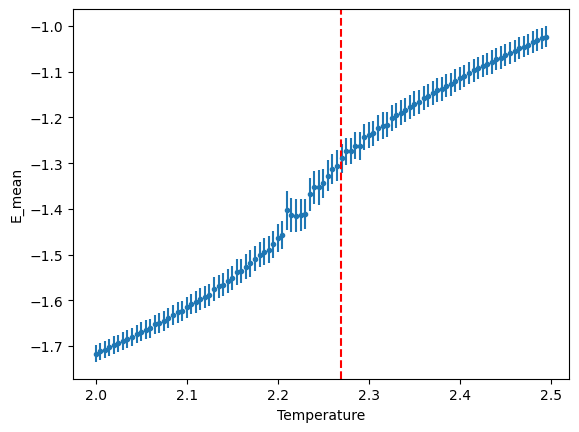

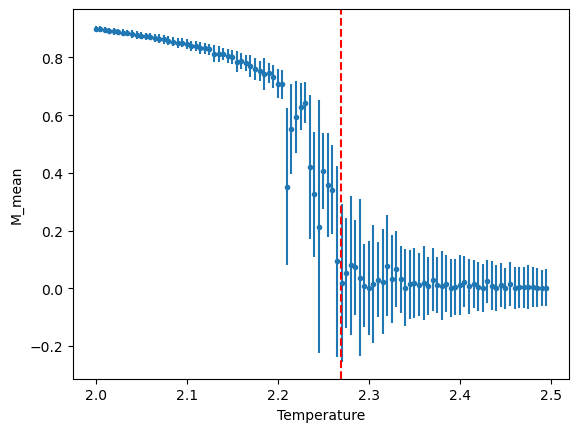

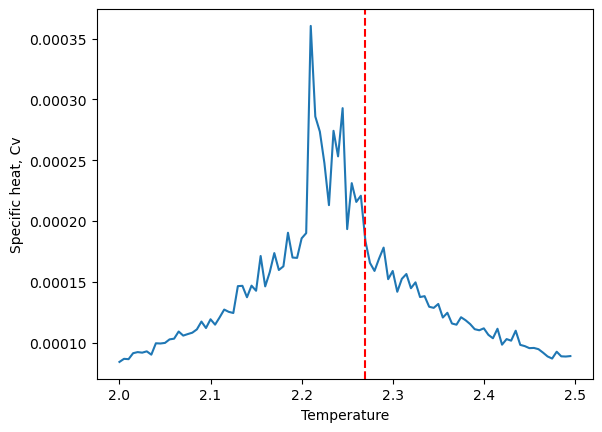

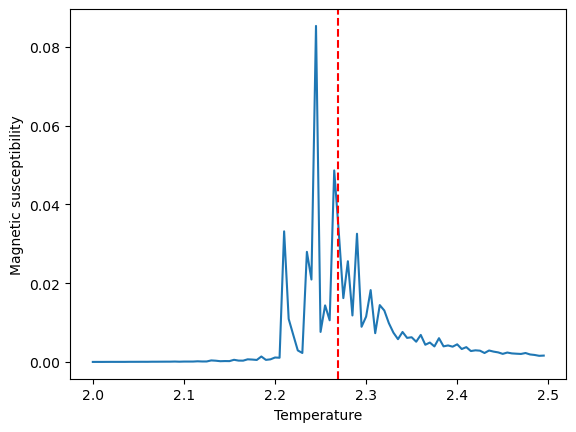

In [105]:
filepath = 'data/final'
identifier = '2.00T2.50'
version = '0'

EMfilename = identifier + '_EM_v' + version + '.csv'

EMfile = filepath + '/' + EMfilename

# Read the CSV file, skipping the first three rows
data = pd.read_csv(EMfile, skiprows=3)

# Drop the first two rows
# data = data.drop([0, 1, 2])

# Convert columns to numeric
data = data.apply(pd.to_numeric)

Temp = data['Temp']
E_mean = data['E_mean']
E_std = data['E_std']
M_mean = np.abs(data['M_mean'])
M_std = data['M_std']

# Plot E_mean vs Temp
# plt.figure(figsize=(10, 5))
plt.errorbar(Temp, E_mean, yerr=E_std, fmt='.')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('E_mean')
# plt.title('E_mean vs Temp')
plt.show()

# Plot M_mean vs Temp
# plt.figure(figsize=(10, 5))
plt.errorbar(Temp, M_mean, yerr=M_std, fmt='.')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('M_mean')
# plt.title('M_mean vs Temp')
plt.show()

# Calculate Cv
Cv = (E_std ** 2) / (Temp ** 2)

# Plot Cv vs Temp
# plt.figure(figsize=(10, 5))
plt.plot(Temp, Cv, linestyle='-')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('Specific heat, Cv')
# plt.title('Specific Heat (Cv) vs Temp')
plt.show()

# Calculate chi
chi = (M_std ** 2) / Temp

# Plot chi vs Temp
# plt.figure(figsize=(10, 5))
plt.plot(Temp, chi, linestyle='-')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility')
# plt.title('Magnetic Susceptibility (chi) vs Temp')

plt.show()

In [106]:
# TERRIBLE CODE TO FOLLOW
# Efficiency is not important in plotting anyway

SCfilename = identifier + '_SC_v' + version + '.csv'

SCfile = filepath + '/' + SCfilename

# Read the CSV file, skipping the first four rows
corr = pd.read_csv(SCfile, skiprows=4, header=None)

# Drop the first three rows
# data = data.drop([0, 1, 2])

# Convert columns to numeric
corr = corr.apply(pd.to_numeric)

corr = corr.values

d = np.arange(corr.shape[1] - 1) + 1

xmax = 49

xvals = np.linspace(0, xmax, 1000)

xi = []

plotting_spatial_corr = False    # change to 'True' if want to plot 

for Tctr in range(Temp.size):
    try:
        exparams, expcov = curve_fit(expCorr, d, corr[Tctr, 1:])

        xcrit = int(np.floor(exparams[0]/1))

        if plotting_spatial_corr:
            print(f'T = {Temp[Tctr]:.4f}')
            print(f'xi = {exparams[0]:.4f}')

        if xcrit > 0:
            params, pcov = curve_fit(powerLaw, d[0: xcrit + 1], corr[Tctr, 1:xcrit + 2])
            if plotting_spatial_corr:
                plt.plot(xvals[xvals<=xcrit], powerLaw(xvals[xvals<=xcrit], *params), color='orange')
                print(f'eta = {2-2-params[0]:.4f}')
        else:
            if plotting_spatial_corr:
                print('Power law not fitted.')

        if plotting_spatial_corr:
            plt.scatter(d, corr[Tctr, 1:])

            plt.xlabel('x')
            plt.ylabel('R(x)')
            plt.plot(xvals, expCorr(xvals, *exparams), color='red')
            plt.title(f'T={corr[Tctr, 0]:.3f}')
            plt.show()

    except RuntimeError:
        exparams = (np.nan,)
        expcov = (np.nan,)
    
    xi.append(exparams[0])

xi = np.array(xi)

plt.plot(Temp, xi)

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

# plt.ylim(0,6)

plt.xlabel('Temperature')
plt.ylabel('Correlation length')
plt.show()

/Users/wayne/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [107]:
Tlo = Temp[Temp < Tc]
Thi = Temp[Temp > Tc]

tlo = (Tlo - Tc)/Tc
thi = (Thi - Tc)/Tc

M_meanlo = M_mean[Temp < Tc]
M_meanhi = M_mean[Temp > Tc]

E_meanlo = E_mean[Temp < Tc]
E_meanhi = E_mean[Temp > Tc]

Cvlo = Cv[Temp < Tc]
Cvhi = Cv[Temp > Tc]

chilo = chi[Temp < Tc]
chihi = chi[Temp > Tc]

xilo = xi[Temp < Tc]
xihi = xi[Temp > Tc]

beta = 0.150


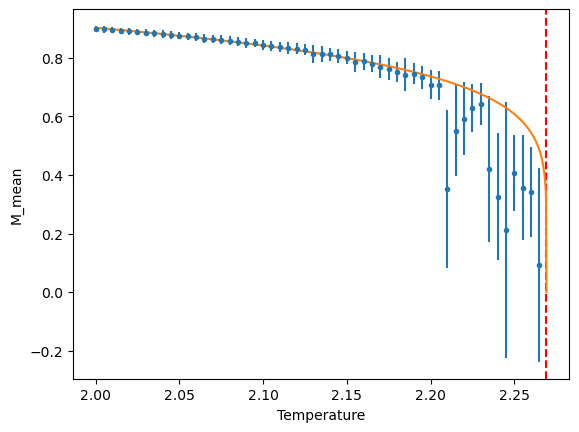

In [108]:
Tmin = 2.00
Tmax = 2.50

Tmin1 = 2.17
Tmax1 = 2.37

# Tmin1 = Tc
# Tmax1 = Tc

tvals = np.linspace(Tmin, Tc, 1000)

params, pcov = curve_fit(powerLaw, tlo[Tmin <= Tlo][Tlo<=Tmin1], M_meanlo[Tmin <= Tlo][Tlo<=Tmin1])
print(f'beta = {params[0]:.3f}')

# plt.figure(figsize=(10, 5))
plt.errorbar(Tlo[Tmin <= Tlo], M_meanlo[Tmin <= Tlo], yerr=M_std[Temp <= Tc][Tmin <= Temp], fmt='.')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('M_mean')
# plt.title('M_mean vs Temp')
plt.show()

(T<Tc) gamma = 2.606
(Tc<T) gamma = 1.400


/var/folders/pk/x0bc9zsx42l2vtpz9sfr5q5h0000gn/T/ipykernel_16055/2728179346.py:2: RuntimeWarning: divide by zero encountered in power
  return A*np.power(np.abs(t), greek)


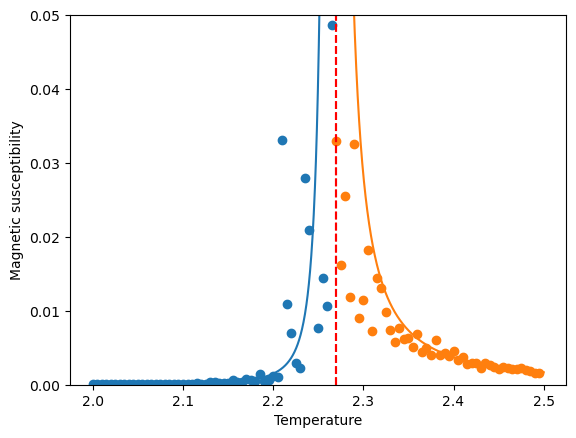

In [109]:
tvals = np.linspace(Tmin, Tc, 1000)

params, pcov = curve_fit(powerLaw, tlo[Tmin <= Tlo][Tlo <= Tmin1], chilo[Tmin <= Tlo][Tlo <= Tmin1])
print(f'(T<Tc) gamma = {-params[0]:.3f}')

# plt.figure(figsize=(10, 5))
plt.scatter(Tlo[Tmin <= Tlo], chilo[Tmin <= Tlo])

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility')
# plt.title('M_mean vs Temp')

tvals = np.linspace(Tc, Tmax, 1000)

params, pcov = curve_fit(powerLaw, thi[Thi <= Tmax][Tmax1 <= Thi], chihi[Thi <= Tmax][Tmax1 <= Thi])
print(f'(Tc<T) gamma = {-params[0]:.3f}')

# plt.figure(figsize=(10, 5))
plt.scatter(Thi[Thi <= Tmax], chihi[Thi <= Tmax])

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility')
# plt.title('M_mean vs Temp')

plt.ylim(0,0.05)
plt.show()

(T<Tc) nu = 0.707
(Tc<T) nu = 0.365


/var/folders/pk/x0bc9zsx42l2vtpz9sfr5q5h0000gn/T/ipykernel_16055/2728179346.py:2: RuntimeWarning: divide by zero encountered in power
  return A*np.power(np.abs(t), greek)


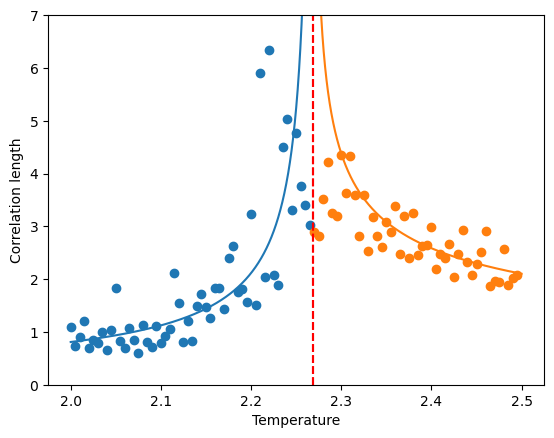

In [110]:
tvals = np.linspace(Tmin, Tc, 1000)

params, pcov = curve_fit(powerLaw, tlo[Tmin <= Tlo][Tlo <= Tmin1], xilo[Tmin <= Tlo][Tlo <= Tmin1])
print(f'(T<Tc) nu = {-params[0]:.3f}')

# plt.figure(figsize=(10, 5))
plt.scatter(Tlo[Tmin <= Tlo], xilo[Tmin <= Tlo])

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('Correlation length')
# plt.title('M_mean vs Temp')

tvals = np.linspace(Tc, Tmax, 1000)

params, pcov = curve_fit(powerLaw, thi[Thi <= Tmax][Tmax1 <= Thi], xihi[Thi <= Tmax][Tmax1 <= Thi])
print(f'(Tc<T) nu = {-params[0]:.3f}')

# plt.figure(figsize=(10, 5))
plt.scatter(Thi[Thi <= Tmax], xihi[Thi <= Tmax])

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('Correlation length')
# plt.title('M_mean vs Temp')

plt.ylim(0,7)
plt.show()